# Gaussian naïve Bayes Classifiers
#### In this program to bulid a classifer based on naive bayes rule, using Iris dataset. Iris dataset has four feature ( sepal length, sepal width, petal length, petal_width ) and *three classes* (iris setosa, iris versicolor, and iris virginica)
Dataset available at: __[Iris Dataset](https://archive.ics.uci.edu/ml/datasets/iris)__

####  pandas, numpy, seaborn, matplotlib.pyplot and sklearn.cross_validation libraries

**Libraries import**

-  pandas for data processing
-  numpy for mathematical operations 
-  sklearn to split dataset 
-  seaborn to draw plot

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.cross_validation

C:\Users\Zaraah\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### This method to calculate P(x|y) >> $p(x|y)=\frac{1}{\sigma \sqrt{2\pi }}exp^{\frac{-\left ( x-\mu \right )^{2}}{2\sigma ^{2}}}$

In [2]:
def p_x_given_y(x, mean_y, variance_y):

    # Input the arguments into a probability density function
    p = 1/(np.sqrt(2*np.pi*variance_y)) * np.exp((-(x-mean_y)**2)/(2*variance_y))
    
    # return p
    return p

### Read data from csv file then split it into train and test sets

In [14]:
path_to_file = "iris.csv"
data = pd.read_csv(path_to_file, encoding = 'utf8')

train, test = sklearn.cross_validation.train_test_split(data, train_size = 0.7,random_state=6 )
test

,sepal_length,sepal_width,petal_length,petal_width,species
4,5.0,3.6,1.4,0.2,setosa
116,6.5,3.0,5.5,1.8,virginica
2,4.7,3.2,1.3,0.2,setosa
23,5.1,3.3,1.7,0.5,setosa
123,6.3,2.7,4.9,1.8,virginica
96,5.7,2.9,4.2,1.3,versicolor
134,6.1,2.6,5.6,1.4,virginica
39,5.1,3.4,1.5,0.2,setosa
137,6.4,3.1,5.5,1.8,virginica
53,5.5,2.3,4.0,1.3,versicolor


## Scatter plot 

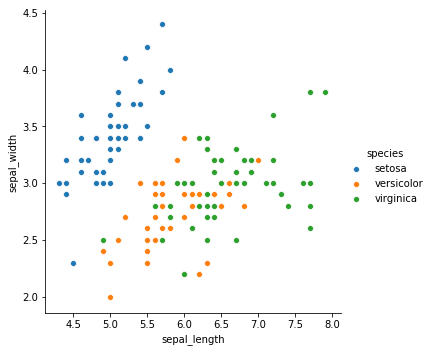

In [15]:
sns.pairplot(data=data,hue='species',x_vars=['sepal_length'],y_vars=['sepal_width'],height=5)

## Calculate Priors
#### p(class)... P(setosa), P(versicolor) and P(virginica)

In [16]:

# Total number of example in test set 
total = train["species"].count()

# Number of example has setosa class 
n_setosa = train["species"].value_counts()["setosa"]

# Number of example has versicolor class 
n_versicolor = train["species"].value_counts()["versicolor"]

# Number of example has virginica class 
n_virginica = train["species"].value_counts()["virginica"]


#P(setosa)
priors_setosa = n_setosa / total

#P(versicolor)
priors_versicolor = n_versicolor / total

#P(virginica)
priors_virginica = n_virginica / total


## Calculate mean 

In [17]:
# Group the data by species and calculate the means of each feature
data_means = train.groupby('species').mean()

# View the mean values
data_means


,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.017143,3.408571,1.462857,0.245714
versicolor,5.991429,2.797143,4.322857,1.340000
virginica,6.600000,3.020000,5.580000,2.080000


## Calculate veriance

In [18]:
# Group the data by species and calculate the variance of each feature
data_variance = data.groupby('species').var()

# View the variance values
data_variance

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,0.124249,0.145180,0.030106,0.011494
versicolor,0.266433,0.098469,0.220816,0.039106
virginica,0.404343,0.104004,0.304588,0.075433


In [19]:


# Mean for setosa
setosa_sepal_length_mean = data_means['sepal_length'][data_variance.index == 'setosa'].values[0]
setosa_sepal_length_mean1 = data_means['sepal_length'][data_means.index == 'setosa'].values[0]
setosa_sepal_width_mean = data_means['sepal_width'][data_variance.index == 'setosa'].values[0]
setosa_petal_length_mean = data_means['petal_length'][data_variance.index == 'setosa'].values[0]
setosa_petal_width_mean = data_means['petal_width'][data_variance.index == 'setosa'].values[0]

# Variance for setosa
setosa_sepal_length_variance = data_variance['sepal_length'][data_variance.index == 'setosa'].values[0]
setosa_sepal_width_variance = data_variance['sepal_width'][data_variance.index == 'setosa'].values[0]
setosa_petal_length_variance = data_variance['petal_length'][data_variance.index == 'setosa'].values[0]
setosa_petal_width_variance = data_variance['petal_width'][data_variance.index == 'setosa'].values[0]


# Mean for virginica
virginica_sepal_length_mean = data_means['sepal_length'][data_variance.index == 'virginica'].values[0]
virginica_sepal_width_mean = data_means['sepal_width'][data_variance.index == 'virginica'].values[0]
virginica_petal_length_mean = data_means['petal_length'][data_variance.index == 'virginica'].values[0]
virginica_petal_width_mean = data_means['petal_width'][data_variance.index == 'virginica'].values[0]


# Variance for virginica
virginica_sepal_length_variance = data_variance['sepal_length'][data_variance.index == 'virginica'].values[0]
virginica_sepal_width_variance = data_variance['sepal_width'][data_variance.index == 'virginica'].values[0]
virginica_petal_length_variance = data_variance['petal_length'][data_variance.index == 'virginica'].values[0]
virginica_petal_width_variance = data_variance['petal_width'][data_variance.index == 'virginica'].values[0]

# Mean for versicolor
versicolor_sepal_length_mean = data_means['sepal_length'][data_variance.index == 'versicolor'].values[0]
versicolor_sepal_width_mean = data_means['sepal_width'][data_variance.index == 'versicolor'].values[0]
versicolor_petal_length_mean = data_means['petal_length'][data_variance.index == 'versicolor'].values[0]
versicolor_petal_width_mean = data_means['petal_width'][data_variance.index == 'versicolor'].values[0]

# Variance for versicolor
versicolor_sepal_length_variance = data_variance['sepal_length'][data_variance.index == 'versicolor'].values[0]
versicolor_sepal_width_variance = data_variance['sepal_width'][data_variance.index == 'versicolor'].values[0]
versicolor_petal_length_variance = data_variance['petal_length'][data_variance.index == 'versicolor'].values[0]
versicolor_petal_width_variance = data_variance['petal_width'][data_variance.index == 'versicolor'].values[0]



## Calculate a Posterior 

In [20]:


#P(setosa| x)
P_of_setosa = priors_setosa * p_x_given_y(test['sepal_length'], setosa_sepal_length_mean, setosa_sepal_length_variance) \
* p_x_given_y(test['sepal_width'], setosa_sepal_width_mean, setosa_sepal_width_variance) \
* p_x_given_y(test['petal_length'], setosa_petal_length_mean, setosa_petal_length_variance) \
* p_x_given_y(test['petal_width'], setosa_petal_width_mean, setosa_petal_width_variance)

# P(virginica| x)
P_of_virginica = priors_virginica * p_x_given_y(test['sepal_length'], virginica_sepal_length_mean, virginica_sepal_length_variance) \
* p_x_given_y(test['sepal_width'], virginica_sepal_width_mean, virginica_sepal_width_variance) \
* p_x_given_y(test['petal_length'], virginica_petal_length_mean, virginica_petal_length_variance) \
* p_x_given_y(test['petal_width'], virginica_petal_width_mean, virginica_petal_width_variance)


# P(versicolor| x)
P_of_versicolor = priors_versicolor * p_x_given_y(test['sepal_length'], versicolor_sepal_length_mean, versicolor_sepal_length_variance) \
* p_x_given_y(test['sepal_width'], versicolor_sepal_width_mean, versicolor_sepal_width_variance) \
* p_x_given_y(test['petal_length'], versicolor_petal_length_mean, versicolor_petal_length_variance) \
* p_x_given_y(test['petal_width'], versicolor_petal_width_mean, versicolor_petal_width_variance)



## Calculate the predicted result

In [21]:
predicted = []
for x, y, z in zip(P_of_setosa, P_of_virginica,P_of_versicolor):
    if(x > y and x > z):
        predicted.append("setosa")
    if(y > x and y > z):
        predicted.append("virginica")
    if(z > x and z > y):
        predicted.append("versicolor")
        


## Compute the accuracy

In [22]:
correct = 0
actual = test["species"]

for x, y in zip(actual, predicted):
    if x == y:
        correct += 1
print("The accuracy is ",(correct / float(len(test))*100),"%") 

The accuracy is  93.33333333333333 %
